In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)

In [3]:
leads = pd.read_csv("bank_loan_leads/train_loan/train.csv")

In [11]:
leads.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [5]:
numerical = leads[['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'Loan_Period', 'EMI']]

In [6]:
# sns.displot(data=leads, x="Monthly_Income", hue="Approved", color="GnYlBu")

In [9]:
def cat_summary(data):
    cols = data.columns
    cat_uniques = []
    modes = []

    for col in cols:
        # Get number of uniques 
        cat_uniques.append(data[col].nunique())
        # Get mode 
        modes.append(data[col].mode()[0])

    table = pd.DataFrame({
        "Feature": cols,
        "Uniques": cat_uniques,
        "Mode": modes
    })

    return table
categorical = leads.drop(numerical, axis=1)
cat_summary(categorical)

,Feature,Uniques,Mode
0,ID,69713,APPA10000905029
1,Gender,2,Male
2,DOB,10759,11/01/82
3,Lead_Creation_Date,92,02/09/16
4,City_Code,678,C10001
5,City_Category,3,A
6,Employer_Code,36617,COM0000002
7,Employer_Category1,3,A
8,Employer_Category2,4,4.0
9,Customer_Existing_Primary_Bank_Code,57,B001


In [8]:
leads.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [9]:
leads['Monthly_Income'].nunique()

5010

In [10]:
leads.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [11]:
leads['Interest_Rate'].describe()

count    22276.000000
mean        19.213570
std          5.847136
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [25]:
print(leads['Interest_Rate'].value_counts().index)

Index([ 20.0, 14.85,  31.5, 13.99, 15.25, 16.75, 18.25,  15.5,  28.5,  18.4,
        13.0,  24.0,  19.0, 15.75,  13.5,  35.5, 18.15,  18.0,  17.0, 16.25,
        17.5,  18.5,  37.0, 14.49, 13.49, 14.25, 13.75,  14.5,  16.0,  32.5,
        27.0, 19.75, 12.99,  15.0,  33.0,  16.5, 16.35,  23.5, 11.99, 13.25,
        16.2, 14.75,  22.0, 17.75,  25.5,  31.0, 15.35,  29.0,  14.8, 16.15,
        29.5, 14.99,  27.5, 19.05,  21.5,  26.5,  23.0,  15.1,  30.5,  24.5,
        14.9,  15.7,  14.3,  15.8, 15.99,  28.0,  14.0, 15.49, 14.55,  20.5,
       15.15,  15.6],
      dtype='float64', name='Interest_Rate')


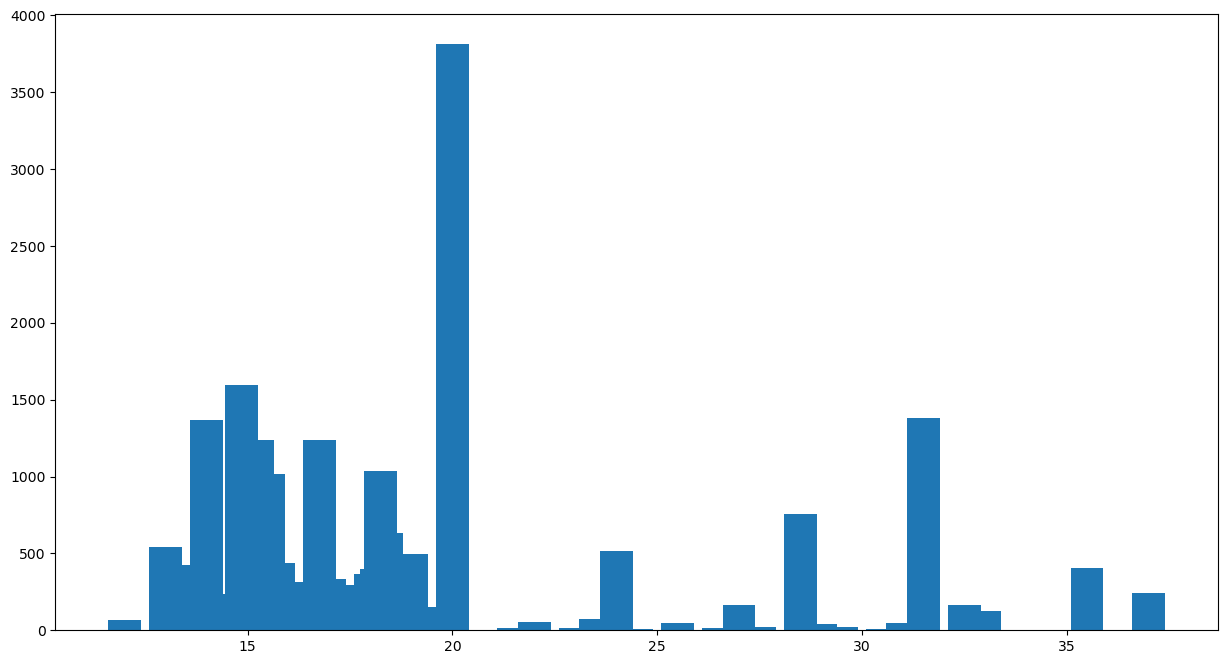

In [27]:
plt.figure(figsize=(15, 8))

plt.bar(x=leads['Interest_Rate'].value_counts().index, height=leads['Interest_Rate'].value_counts())
plt.show()